<a href="https://colab.research.google.com/github/susanjax/GA_cytotoxicity/blob/main/ML_model_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 4.3 MB/s 
     |████████████████████████████████| 127.6 MB 17 kB/s 
     |████████████████████████████████| 1.2 MB 18.0 MB/s 
     |████████████████████████████████| 14.5 MB 38.6 MB/s 
     |████████████████████████████████| 248 kB 61.8 MB/s 
     |████████████████████████████████| 302 kB 48.9 MB/s 
     |████████████████████████████████| 6.8 MB 21.8 MB/s 
     |████████████████████████████████| 10.1 MB 34.0 MB/s 
     |████████████████████████████████| 72 kB 935 kB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=6a3b5dbe4511d45f1a77aea9e1a0e9f5969da87de8d33bd0bc76d2e1aa51a120
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: nump

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('/content/drive/MyDrive/toxicity_project/transformed_data_new.csv')
df

,Unnamed: 0,material,Cell type,test,time (hr),concentration (ug/ml),Hydrodynamic diameter (nm),Zeta potential (mV),mcd,electronegativity,rox,radii,viability (%)
0,0,1,1,1,0.11,0.00,0.36,0.50,1.00,1.00,0.37,0.35,0.48
1,1,1,1,1,0.11,0.00,0.36,0.50,1.00,1.00,0.37,0.35,0.41
2,2,1,1,1,0.11,0.00,0.36,0.50,1.00,1.00,0.37,0.35,0.46
3,3,1,1,1,0.11,0.01,0.36,0.50,1.00,1.00,0.37,0.35,0.42
4,4,1,1,1,0.11,0.02,0.36,0.50,1.00,1.00,0.37,0.35,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,3149,12,16,9,0.04,0.05,0.21,0.60,0.30,0.76,0.00,0.96,0.38
3150,3150,12,16,9,0.04,0.06,0.21,0.60,0.30,0.76,0.00,0.96,0.38
3151,3151,12,16,9,0.04,0.07,0.21,0.60,0.30,0.76,0.00,0.96,0.44
3152,3152,12,16,9,0.04,0.09,0.21,0.60,0.30,0.76,0.00,0.96,0.39


In [4]:
# Perform data splitting using 80/20 ratio
X = df.loc[:, 'Cell type': 'radii'].values 
Y = df.loc[:, 'viability (%)'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)
#models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
#models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:13<00:00,  3.05it/s]


In [6]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.77,0.77,0.06,1.67
ExtraTreesRegressor,0.74,0.74,0.06,0.78
LGBMRegressor,0.71,0.72,0.07,0.43
HistGradientBoostingRegressor,0.71,0.71,0.07,0.50
RandomForestRegressor,0.69,0.69,0.07,2.16
BaggingRegressor,0.66,0.67,0.07,0.21
KNeighborsRegressor,0.53,0.54,0.08,0.05
GradientBoostingRegressor,0.52,0.53,0.09,0.36
NuSVR,0.48,0.49,0.09,1.54


In [7]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.77,0.77,0.06,1.67
ExtraTreesRegressor,0.74,0.74,0.06,0.78
LGBMRegressor,0.71,0.72,0.07,0.43
HistGradientBoostingRegressor,0.71,0.71,0.07,0.50
RandomForestRegressor,0.69,0.69,0.07,2.16
BaggingRegressor,0.66,0.67,0.07,0.21
KNeighborsRegressor,0.53,0.54,0.08,0.05
GradientBoostingRegressor,0.52,0.53,0.09,0.36
NuSVR,0.48,0.49,0.09,1.54


#Data Visualization


[(0.0, 1.0)]

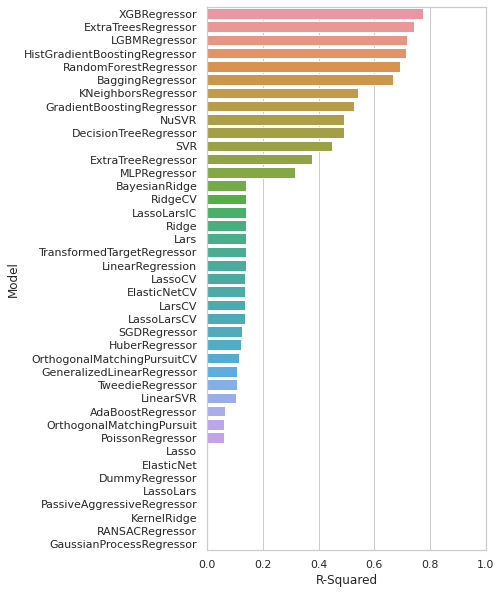

In [8]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

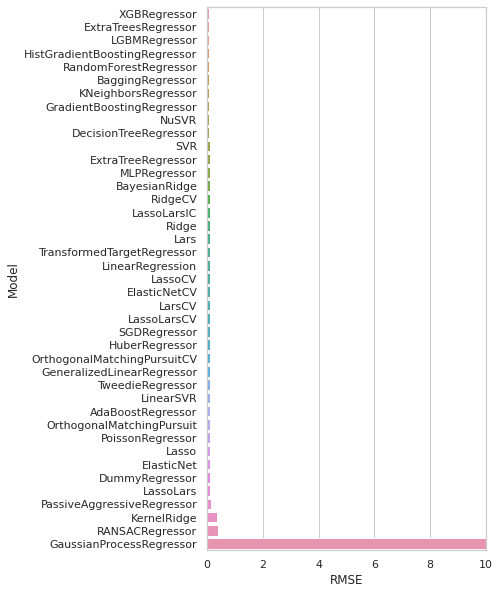

In [9]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

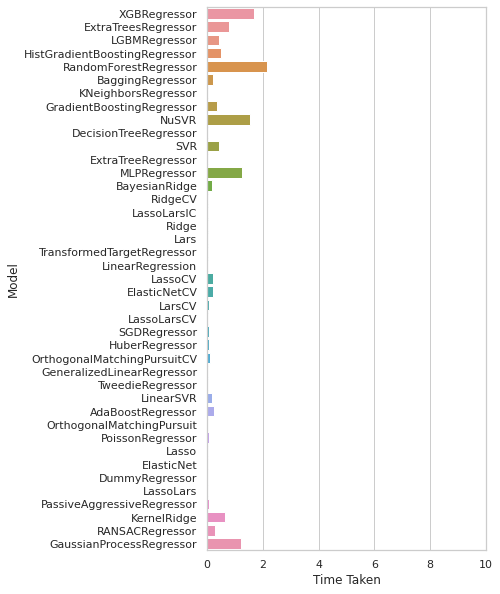

In [10]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))